In [12]:
using Plots, ComplexPhasePortrait, ApproxFun, SingularIntegralEquations
gr();

# M3M6: Methods of Mathematical Physics

$$
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\dx{\D x}
\def\dt{\D t}
\def\C{{\mathbb C}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqfor{\qquad\hbox{for}\qquad}
$$

Dr. Sheehan Olver
<br>
s.olver@imperial.ac.uk

Office Hours: 3-4pm Mondays, Huxley 6M40
<br>
Website: https://github.com/dlfivefifty/M3M6LectureNotes




# Lecture 9: Cauchy transforms

1. Cauchy transforms on the interval
    - Plemelj's theorem
2. Hilbert transform
    
Consider a function $\phi(z)$ analytic in $\bar\C \backslash [-1,1]$ such that $\phi(\infty) = 0$. Surrounding it by a positively oriented simple closed contour $\Gamma$ (e.g., an ellipse) we have from Cauchy's exterior integral formula
$$
\phi(z) = -{1 \over 2 \pi \I} \oint_\Gamma {\phi(\zeta) \over \zeta - z} \D\zeta
$$
Assuming the limits 
$$
\phi^\pm(x) = \lim_{\epsilon \rightarrow 0} \phi(x \pm \I \epsilon)
$$
are "nice", we can deform $\Gamma$ to be on the contour itself, giving 
$$
\phi(z) = {1 \over 2 \pi \I} \int_{-1}^1 {\phi^+(x) - \phi^-(x) \over x - z} \dx
$$
This lecture studies the relationship between the subtractive jump $\phi^+(x) - \phi^-(x)$ and $\phi(z)$. 


# Cauchy transform on the interval


We can consistently construct a function with a prescribed subtractive jump using the _Cauchy transform_, which really is just Cauchy's integral formula but where we know nothing about $f(\zeta)$: we don't assume it is analytic.

**Definition (Cauchy transform)** 
$$
\CC_\gamma f(z) := {1 \over 2 \pi \I} \int_\gamma {f(\zeta) \over \zeta - z} \D\zeta
$$


We focus on the case of an interval $[a,b]$:
$$
\CC_{[a,b]} f(z) := {1 \over 2 \pi \I} \int_a^b {f(x) \over x - z} \dx
$$
Here is a phase portrait of the Cauchy transform of a simple function:

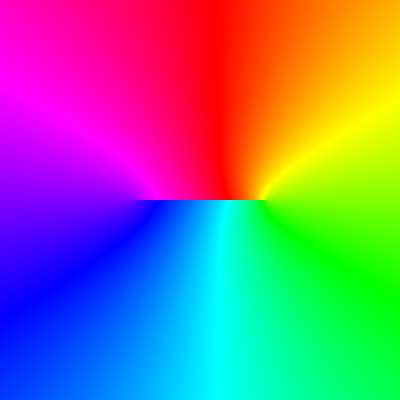

In [13]:
x = Fun(-1 .. 1)
f = exp(x)*sqrt(1-x^2)
portrait(-3..3, -3..3, z -> cauchy(f,z))

**Remark** As an aside, these integrals are computationally difficult because of the singularity in the integrand, hence standard integration methods become slow as $z$ approaches the interval. There are other specialised routines (as implemented in `cauchy(f,z)`) that are much more efficient:

In [14]:
z = 0.1 +0.001im
@time cauchy(f, z )
@time sum(f/(x-z))/(2π*im)

  0.000018 seconds (13 allocations: 640 bytes)
  0.013608 seconds (287 allocations: 12.823 MiB)


0.5493442175548764 - 0.2181261671282511im

It turns out that the Cauchy transform has a very simple subtractive jump. Here we denote
$$
    \CC_{[a,b]}^+ f(x) = \lim_{\epsilon \rightarrow 0} \CC_{[a,b]} f( x+ \I \epsilon)\\
        \CC_{[a,b]}^- f(x) = \lim_{\epsilon \rightarrow 0} \CC_{[a,b]} f( x- \I \epsilon)
$$


**Theorem (Plemelj on the interval I)**
Suppose $(b-x)^\alpha (x-a)^\beta f(x)$ is differentiable  on $[a,b]$, for $\alpha, \beta < 1$. Then the Cauchy transform has the following properties:
1. $\CC_{[a,b]} f(z)$ is analytic in $\bar \C \backslash [a,b]$
3. $\CC_{[a,b]} f(\infty) = 0$
4. It has the subtractive jump:
$$
\CC_{[a,b]}^+ f(x) - \CC_{[a,b]}^- f(x) = f(x) \qqfor a < x < b
$$
2. $\CC_{[a,b]} f(z)$ has weaker than pole singularities at $a$ and $b$

_Demonstration_ We can evaluate the Cauchy transform using `cauchy`, including the limit from above and below. Here we see numerically that we recover $f$ from taking the difference:

In [ ]:
cauchy(f, 0.1+0.0im)-cauchy(f, 0.1-0.0im) , f(0.1)

**Sketch of Proof** 
We show the proof for $[-1,1]$.

1. From the dominated convergence theorem, we know that $\CC f(z)$ is complex-differentiable off $[-1,1]$:
$$
{\D \over \D z} {\cal C} f(z) = {1 \over 2 \pi \I}\int_{-1}^1  {\D \over \D z} {f(x) \over x - z} \dx = {1 \over 2 \pi \I}\int_{-1}^1   {f(x) \over (x - z)^2} \dx
$$
We know it is analytic at $\infty$ because
$$
{\cal C} f(z^{-1}) = z {1 \over 2 \pi \I}\int_{-1}^1   {f(x) \over z x - 1} \dx
$$
is differentiable at zero. 
2. ${\cal C} f(\infty) = 0$ follows from uniform convergence of $1 \over z - x$ to zero as $z \rightarrow \infty$.
3.  For the constant function, which is analytic, this follows by considering a contour $\gamma_x^+$ perturbed above $x$ and $\gamma_x^-$ perturbed below $x$, see plots below.  Therefore, by Cauchy integral formula we have
$$
\CC^+ 1 (x) - \CC^- 1 (x) = {1 \over 2 \pi \I}\int_{\gamma_x^+} {1 \over x - z} \dx - {1 \over 2 \pi \I}\int_{\gamma_x^-} {1 \over x - z} \dx = {1 \over 2 \pi \I} \oint {1 \over x -z } \dx = 1.
$$
For other functions, we consider, for $z = x + \I \epsilon$,
$$
    {\cal C} f(z) =   {1 \over 2 \pi \I} \int_{-1}^1 {f(t) - f(x) \over t - z} \dt + f(x) \CC 1(z)
$$
For $\epsilon = 0$, the first integral exists because the singularity at $t = x$ is removable: 
$$
\lim_{t \rightarrow x} {f(t) - f(x) \over t - x} = f'(x)
$$
We leave it as an excercise (or see [Trogdon & Olver 2015, Lemma 2.7]) to show that $\int_{-1}^1 {f(t) - f(x) \over t - z} \dt$ converges to $\int_{-1}^1 {f(t) - f(x) \over t - x} \dt$ as $z \rightarrow x$. It follows that
$$
{\cal C}^\pm f(x) =   {1 \over 2 \pi \I} \int_{-1}^1 {f(t) - f(x) \over t - x} \dt + f(x) \CC^\pm 1(x)
$$
and in particular
$$
{\cal C}^+ f(x) - {\cal C}^- f(x)  =  f(x) (\CC^+ 1(x) - \CC^- 1(x)) = f(x)
$$
4. We show that it has a weaker than pole singularity at $+1$, with $-1$ following by the same argument. First note that $f$ is absolutely integrable. If we assume we approach $1$ at an angle of $ -\pi + \delta \leq \theta \leq \pi - \delta$, the uniform convergence of $(z - 1) \CC f(z)$ to zero follows from observing that ${z-1 \over z - t}$ can be made arbitrarily small in a larger and larger interval. This is easiest to see for real $x > 1$, where for
 $1 \leq x \leq 1 + \epsilon^2$ we have
$$
\left|{x -1 \over x-t }\right| \leq \epsilon
$$
for all $t \leq 1 + \epsilon^2 - \epsilon$, or more generously, $t \leq 1 - \epsilon$. Therefore,
$$
| (x-1) {\cal C} f(x) | \leq {1 \over 2 \pi}\int_{-1}^{1-\epsilon} |f(t) | \left|{x -1 \over x-t }\right| \dt + \int_{1-\epsilon}^1 |f(t) | \dt \leq
\epsilon \int_{-1}^1 |f(t)| \dt + \int_{1-\epsilon}^1 |f(t) | \dt
$$
Both terms tends to zero as $\epsilon \rightarrow 0$, hence so does $| (x-1) {\cal C} f(x) |$.  To extend this to the interval itself (that is, $\delta = 0$), we  use the stronger requirement that $(1-x)^\alpha(1+x)^\beta f(x)$ is differentiable. For $\alpha = \beta = 0$, this follows from the expression in condition (3) and the fact that (found via direct integration)
$$
    \CC 1(z) =  {\log(z-1) - \log(z+1) \over 2 \pi \I}
$$    
has only logarithmic singularities, and $f(x)$ is bounded.

⬛️


Here is a plot of ${x - 1 \over x- t}$ showing that it is small on an increasing portion of the interval as $x \rightarrow 1$ from the right:

In [ ]:
x = 1 + 0.01
tt = linspace(-1.,1.,1000)
plot(tt, abs.((x - 1) ./ (x .- tt)); legend=false)

Here is a plot of $\gamma_x^\pm$:

In [ ]:
x = 0.4
r = 0.1
tt = linspace(π,0.,100)
plot([-1.; x + r*cos.(tt);1.0], [0.; r*sin.(tt); 0.0];ylims=(-0.5,0.5),label="g_x^+")
plot!([-1.; x + r*cos.(tt);1.0], [0.; -r*sin.(tt); 0.0];ylims=(-0.5,0.5),label="g_x^-")

We can use the results of the previous results to show that it is in fact unique.


**Theorem (Plemelj on the interval II)** Suppose $\phi(z)$ satsfies the following properties:
1. $\phi(z)$ is analytic in $\bar \C \backslash [a,b]$
2. $\phi(z)$ has weaker than pole singularities at $a$ and $b$
3. $\phi(\infty) = 0$
4. It has the subtractive jump:
$$
\phi^+(x) - \phi^-(x) = f(x) \qqfor a < x < b
$$
where $(b-x)^\alpha (x-a)^\beta f(x)$ is differentiable in $[a,b]$ for $\alpha,\beta < 1$.  

Then $\phi(z) = {\cal C}_{[a,b]} f(z)$.

**Sketch of Proof**
Consider 
$$A(z) = \phi(z) - {\cal C}_{[a,b]} f(z)$$
This is continuous (hence analytic) on $(a,b)$ as
$$A^+(x) - A^-(x) = \phi^+(x) -\phi^-(x) - {\cal C}_{[a,b]}^+ f(x) + {\cal C}_{[a,b]}^- f(x)  =f(x) - f(x) = 0$$
Also, $A$ has weaker than pole singularities at $a$ and $b$, hence is analytic there as well: it's entire. Only entire functions that are bounded are constant, since it vanishes at $\infty$ the constant must be zero.

⬛️


_Example 1_ We can use this theorem to prove the following relationships  (using $\diamond$ for the dummy variable):

$$
{1 \over \sqrt{z-1} \sqrt{z+1}} = -2 \I {\cal C}\left[{1 \over \sqrt{1-\diamond^2}}\right](z) = -{1 \over \pi}\int_{-1}^1 {\dx \over \sqrt{1-x^2} (x-z)}
$$
(1) follows because the jumps cancel. (2 and 3) are immediate. (4) follows from a simple calculation. Here we show that it has the correct jump:

In [ ]:
x = Fun()
z = 2 +2im
1/(sqrt(z-1)sqrt(z+1)),-2im*cauchy(1/sqrt(1-x^2),z)

_Example 2_ Now consider a problem of reducing 
$$
\phi(z) = \sqrt{z-1} \sqrt{z+1}
$$ 
to its behaviour near its singularities. It has two singularities: it blows up at $\infty$ and has a branch cut on $[-1,1]$


We can subtract out the singularity at infinity first to determine

$$\phi(z) = z  + 2 \I {\cal C}[\sqrt{1-\diamond^2}](z)$$

Note this works because, as $z \rightarrow \infty$, we have 
$$
\phi(z) = z (\sqrt{1-{1/z}}\sqrt{1 + {1/z}}) = z (1 + O({1/z}))(1+O(1/z)) = z + O(1/z)
$$
hence $\phi(z) - z$ vanishes at the origin. This is an example of summing over the behaviour at each singularity to recover the function (in this case, $\phi$ has a singularity along the cut $[-1,1]$ and polynomial growth at $\infty$). 

Because $\phi(z)-z$ decays, we can now deploy Plemelj II to determine:
$$
\phi(z) -z = \CC[\phi_+-\phi_-](z)
$$
where
$$
\phi_+(x) - \phi_-(x) = 2\I \sqrt{1-x^2}
$$
Here we see that our derived expression matches $phi(z)$:

In [ ]:
sqrt(z-1)sqrt(z+1), z +2im*cauchy(sqrt(1-x^2),z)

_Example 3_ Finally, we have the following (also verifiable using indefinite integration):

$${\log(z-1) - \log(z+1) \over 2 \pi \I} =  {\cal C}[1](z) = {1 \over 2 \pi \I} \int_{-1}^1 {\dx \over x -z} $$

In [ ]:
(log(z-1)-log(z+1))/(2π*im),cauchy(Fun(one(x)),z)